# CS210: Data Management for Data Science Assignment 3
##### Aatif Sayed&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;(NetID: as3259)
##### Akshada Rajadhyksha&emsp;(NetID: aar219)
## Problem 1: EU Cities Temperatures Dataset (55 points)
Given a CSV data file as represented by the sample file EuCitiesTemperatures.csv (213 records), load it into a Pandas DataFrame and perform the following tasks on it.

**Important: Your code should be applicable to any extension of this sample, so make sure you don't hardcode anything that applies only to the values in this dataset.**
### 1.1: Preprocessing/Analysis (28 pts)
1. [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [1]:
# Problem 1.1.1

# Import necessary modules
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame

# Read and load CSV file
data = pd.read_csv("EuCitiesTemperatures.csv")

# Initialize empty dictionaries (one to map countries to latitudes and one to map countries to longitudes)
country_latitude_dict = {}
country_longitude_dict = {}

# Populate dictionaries with country mapped to a list of latitudes/longitudes (excludes NaN values)
for index in data.index :
    if not np.isnan(data.loc[index, "latitude"]) :
        if data.loc[index, "country"] not in country_latitude_dict.keys() :
            country_latitude_dict[data.loc[index, "country"]] = [float(data.loc[index, "latitude"])]
        else :
            country_latitude_dict[data.loc[index, "country"]].append(float(data.loc[index, "latitude"]))
    if not np.isnan(data.loc[index, "longitude"]) :
        if data.loc[index, "country"] not in country_longitude_dict.keys() :
            country_longitude_dict[data.loc[index, "country"]] = [float(data.loc[index, "longitude"])]
        else :
            country_longitude_dict[data.loc[index, "country"]].append(float(data.loc[index, "longitude"]))

# Find average latitude for each country, round to 2 decimal places, and update dictionary accordingly 
for k, v in country_latitude_dict.items() :
    v = round(np.mean(v), 2)
    country_latitude_dict.update({k : v})
    
# Find average longitude for each country, round to 2 decimal places, and update dictionary accordingly
for k, v in country_longitude_dict.items() :
    v = round(np.mean(v), 2)
    country_longitude_dict.update({k : v})

# Replace NaN values for latitude/longitude with calculated averages for the corresponding country
for index in data.index :
    if np.isnan(data.loc[index, "latitude"]) :
        data.loc[index, "latitude"] = country_latitude_dict.get(data.loc[index, "country"])
    if np.isnan(data.loc[index, "longitude"]) :
        data.loc[index, "longitude"] = country_longitude_dict.get(data.loc[index, "country"])
        
# Export updated data to a new CSV file (prevents original file from being modified)
data.to_csv("EuCitiesTemperaturesUpdated.csv", index=False)

# Shows that there are no more null values remaining in "latitude" and "longitude" columns
data.info()

# Show a sample output
data.head(60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         213 non-null    object 
 1   country      213 non-null    object 
 2   population   213 non-null    float64
 3   EU           213 non-null    object 
 4   coastline    213 non-null    object 
 5   latitude     213 non-null    float64
 6   longitude    213 non-null    float64
 7   temperature  149 non-null    float64
dtypes: float64(4), object(4)
memory usage: 13.4+ KB


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [2]:
# Problem 1.1.2

# Initialize two empty lists (to hold cities and countries which fall under conditions described by problem)
cities = []
countries = []

# Initialize empty dictionary (to map countries to a list of cities which exist within a country)
country_city_dict = {}

# Populate dictionary and "cities" list with cities and countries which fall under the given conditions
for index in data.index :
    lat_temp = data.loc[index, "latitude"]
    long_temp = data.loc[index, "longitude"]
    if lat_temp >= 40 and lat_temp <= 60 and long_temp >= 15 and long_temp <= 30 :
        cities.append(data.loc[index, "city"])
        if data.loc[index, "country"] not in country_city_dict :
            country_city_dict[data.loc[index, "country"]] = [data.loc[index, "city"]]
        else :
            country_city_dict[data.loc[index, "country"]].append(data.loc[index, "city"])

# Update dictionary so that each country maps to number of cities that it has which fall under given conditions
for k, v in country_city_dict.items() :
    v = len(v)
    country_city_dict.update({k : v})

# Output cities which fall under given conditions in a numbered list format
count = 1
print("Cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive):")
for city in cities :        
    print(f'\t{count}. {city}')
    count += 1

# Blank line to separate the 2different outputs (helps maintain a cleaner output)
print()    

# Populate "countries" list with indices of countries which have the highest number of cities meeting conditions
countries = [i for i, x in enumerate(country_city_dict.values()) if x == max(country_city_dict.values())]

# Output countries which fall under given conditions in a numbered list format
count = 1
print("Countries which have the maximum number of cities in this geographical band:")
for country in countries :
    print(f'\t{count}. {list(country_city_dict)[country]}')
    count += 1

Cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive):
	1. Elbasan
	2. Vienna
	3. Minsk
	4. Orsha
	5. Pinsk
	6. Brest
	7. Hrodna
	8. Mazyr
	9. Plovdiv
	10. Burgas
	11. Pleven
	12. Ruse
	13. Stara Zagora
	14. Split
	15. Brno
	16. Ostrava
	17. Tartu
	18. Tallinn
	19. Budapest
	20. Debrecen
	21. Gyor
	22. Szeged
	23. Bari
	24. Foggia
	25. Daugavpils
	26. Riga
	27. Klaipeda
	28. Kaunas
	29. Vilnius
	30. Skopje
	31. Balti
	32. Chisinau
	33. Podgorica
	34. Bialystok
	35. Bydgoszcz
	36. Bytom
	37. Elblag
	38. Kielce
	39. Koszalin
	40. Poznan
	41. Wroclaw
	42. Warsaw
	43. Botosani
	44. Braila
	45. Bucharest
	46. Craiova
	47. Sibiu
	48. Arad
	49. Bacau
	50. Baia Mare
	51. Constanta
	52. Belgrade
	53. Nis
	54. Novi Sad
	55. Bratislava
	56. Kosice
	57. MalmÃ¶
	58. Uppsala
	59. Bursa
	60. Edirne
	61. Tekirdag
	62. Chernivtsi
	63. Rivne

Countries which have the maximum number of cities in this geographical band:
	1. Poland
	2. Romania


3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).

For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [3]:
# Problem 1.1.3

# Initialize four empty lists (one for each region)
EU_and_coastline = []
EU_only = []
coastline_only = []
neither_EU_nor_coastline = []

# Populate lists with individual temperatures for the corresponding region (excludes NaN values)
for index in data.index :
    if not np.isnan(data.loc[index, "temperature"]) :
        if data.loc[index, "EU"] == "yes" and data.loc[index, "coastline"] == "yes" :
            EU_and_coastline.append(data.loc[index, "temperature"])
        if data.loc[index, "EU"] == "yes" and data.loc[index, "coastline"] == "no" :
            EU_only.append(data.loc[index, "temperature"])
        if data.loc[index, "EU"] == "no" and data.loc[index, "coastline"] == "yes" :
            coastline_only.append(data.loc[index, "temperature"])
        if data.loc[index, "EU"] == "no" and data.loc[index, "coastline"] == "no" :
            neither_EU_nor_coastline.append(data.loc[index, "temperature"])

# Find average temperature for each region, round to 2 decimal places, and update region variables accordingly
EU_and_coastline_average = round(np.mean(EU_and_coastline), 2)
EU_only_average = round(np.mean(EU_only), 2)
coastline_only_average = round(np.mean(coastline_only), 2)
neither_EU_nor_coastline_average = round(np.mean(neither_EU_nor_coastline), 2)

# Replace NaN values for temperature with calculated averages for the corresponding region
for index in data.index :
    if np.isnan(data.loc[index, "temperature"]) :
        if data.loc[index, "EU"] == "yes" and data.loc[index, "coastline"] == "yes" :
            data.loc[index, "temperature"] = EU_and_coastline_average
        if data.loc[index, "EU"] == "yes" and data.loc[index, "coastline"] == "no" :
            data.loc[index, "temperature"] = EU_only_average
        if data.loc[index, "EU"] == "no" and data.loc[index, "coastline"] == "yes" :
            data.loc[index, "temperature"] = coastline_only_average
        if data.loc[index, "EU"] == "no" and data.loc[index, "coastline"] == "no" :
            data.loc[index, "temperature"] = neither_EU_nor_coastline_average

# Export updated data to the same CSV file that we created earlier (prevents original file from being modified)
data.to_csv("EuCitiesTemperaturesUpdated.csv", index=False)

# Shows that there are no more null values remaining in "temperature" column
data.info()

# Show a sample output
data.head(60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         213 non-null    object 
 1   country      213 non-null    object 
 2   population   213 non-null    float64
 3   EU           213 non-null    object 
 4   coastline    213 non-null    object 
 5   latitude     213 non-null    float64
 6   longitude    213 non-null    float64
 7   temperature  213 non-null    float64
dtypes: float64(4), object(4)
memory usage: 13.4+ KB


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


### 1.2 Visualization (27 pts)
__For all plots, make sure to label the axes, and set appropriate tick labels.__

1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

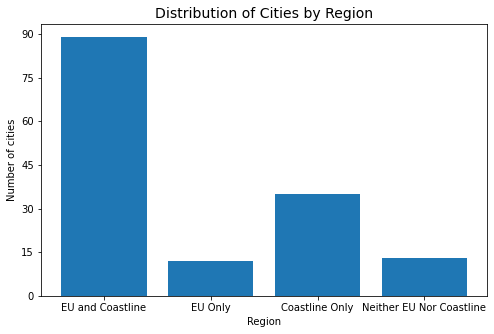

In [4]:
# Problem 1.2.1

# Import necessary modules
from matplotlib import pyplot as plt

regions = ["EU and Coastline", "EU Only", "Coastline Only", "Neither EU Nor Coastline"]
num_cities_per_region = [len(EU_and_coastline), len(EU_only), len(coastline_only), len(neither_EU_nor_coastline)]
plt.figure(figsize=(8,5))
plt.bar(range(len(num_cities_per_region)), num_cities_per_region)
plt.xticks(range(len(num_cities_per_region)), regions)  # first arg is numeric set, second is mapped labels
plt.yticks(range(0,91,15))
plt.xlabel('Region')
plt.ylabel('Number of cities')
plt.title('Distribution of Cities by Region', fontsize='14')
plt.show()

2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

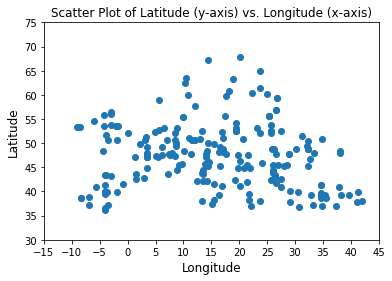

In [5]:
# Problem 1.2.2

x = data["longitude"]
y = data["latitude"]
plt.scatter(x,y)
plt.xticks(range(-15,46,5))
plt.yticks(range(30,76,5))
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title("Scatter Plot of Latitude (y-axis) vs. Longitude (x-axis)")
plt.show()

3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

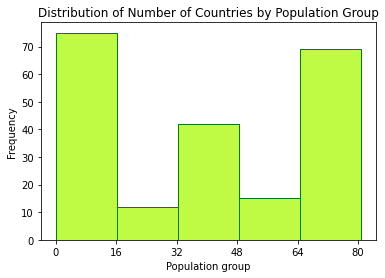

In [6]:
# Problem 1.2.3

plt.figure()
plt.title("Distribution of Number of Countries by Population Group")
plt.xticks(range(0,81,16))
plt.xlabel('Population group')
plt.ylabel('Frequency')
plt.hist(data["population"], bins=5, color='#bffa45',edgecolor='green')
plt.show()

4. [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

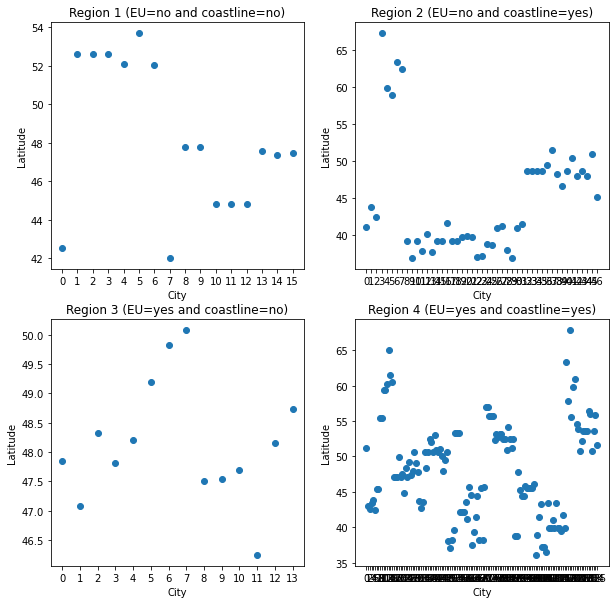

In [41]:
# Problem 1.2.4

fig, axes = plt.subplots(2,2, figsize=(10,10))

df1 = data.loc[(data['EU'] == 'no') & (data['coastline'] == 'no')]
df2 = data.loc[(data['EU'] == 'no') & (data['coastline'] == 'yes')]
df3 = data.loc[(data['EU'] == 'yes') & (data['coastline'] == 'no')]
df4 = data.loc[(data['EU'] == 'yes') & (data['coastline'] == 'yes')]

axes[0,0].scatter(range(len(df1)), df1['latitude'])
axes[0,0].set_xticks(range(len(df1)))
axes[0,0].set_xlabel('City')
axes[0,0].set_ylabel('Latitude')
axes[0,0].set_title('Region 1 (EU=no and coastline=no)')

axes[0,1].scatter(range(len(df2)), df2['latitude'])
axes[0,1].set_xticks(range(len(df2)))
axes[0,1].set_xlabel('City')
axes[0,1].set_ylabel('Latitude')
axes[0,1].set_title('Region 2 (EU=no and coastline=yes)')

axes[1,0].scatter(range(len(df3)), df3['latitude'])
axes[1,0].set_xticks(range(len(df3)))
axes[1,0].set_xlabel('City')
axes[1,0].set_ylabel('Latitude')
axes[1,0].set_title('Region 3 (EU=yes and coastline=no)')

axes[1,1].scatter(range(len(df4)), df4['latitude'])
axes[1,1].set_xticks(range(len(df4)))
axes[1,1].set_xlabel('City')
axes[1,1].set_ylabel('Latitude')
axes[1,1].set_title('Region 4 (EU=yes and coastline=yes)');



# df1

# axes[0,0].scatter(range(len(EU_and_coastline)), EU_and_coastline)
# plt.xticks(range(len(EU_and_coastline)))
# plt.xlabel('City')
# plt.ylabel('Latitude')
# axes[0,1].scatter(range(len(EU_only)), EU_only)
# plt.xticks(range(len(EU_only)))
# plt.xlabel('City')
# plt.ylabel('Latitude')
# axes[1,0].scatter(range(len(coastline_only)), coastline_only)
# plt.xticks(range(len(coastline_only)))
# plt.xlabel('City')
# plt.ylabel('Latitude')
# axes[1,1].scatter(range(len(neither_EU_nor_coastline)), neither_EU_nor_coastline)
# plt.xticks(range(len(neither_EU_nor_coastline)))
# plt.xlabel('City')
# plt.ylabel('Latitude')

# print(len(EU_and_coastline))
# count = 1
# for element in EU_and_coastline :
#     print(f'{count}: {element}')
#     count += 1
    
# print(len(EU_only))
# count = 1
# for element in EU_only :
#     print(f'{count}: {element}')
#     count += 1
    
# print(len(coastline_only))
# count = 1
# for element in coastline_only :
#     print(f'{count}: {element}')
#     count += 1
    
# print(len(neither_EU_nor_coastline))
# count = 1
# for element in neither_EU_nor_coastline :
#     print(f'{count}: {element}')
#     count += 1

# fig, axes = plt.subplots(2,2, figsize=(10,4), sharey=True, sharex=True)
# fig.tight_layout(pad=2.0)

# latitudes = data.latitude
# cities = data.city

# axes[0].scatter(cities, latitudes)
# axes[0].set_title('Latitude Vs. City')

# axes[1].scatter(cities, latitudes)
# axes[1].set_title('Latitude Vs. City')

# fig2, axes2 = plt.subplots(1,2, figsize=(10,4))
# fig2.tight_layout(pad=2.0)

# latitudes2 = data.latitude
# cities2 = data.city

# axes2[0].scatter(cities2, latitudes2)
# axes2[0].set_title('Latitude Vs. City')

# axes2[1].scatter(cities2, latitudes2)
# axes2[1].set_title('Latitude Vs. City')

# plt.show()